In [41]:
using PyCall
unshift!(PyVector(pyimport("sys")["path"]), "");
@pyimport Compute_Jacobian_MA
@pyimport GLS_Apr_weekday_PM_ext

In [42]:
numNodes = Compute_Jacobian_MA.numNodes;
numLinks = Compute_Jacobian_MA.numLinks;
numODpairs = Compute_Jacobian_MA.numODpairs;
numZones = Compute_Jacobian_MA.numZones
od_pairs = Compute_Jacobian_MA.od_pairs;
link_list_js = Compute_Jacobian_MA.link_list_js;
link_length_list = Compute_Jacobian_MA.link_length_list;

flow_observ = GLS_Apr_weekday_PM_ext.x_

74x30 Array{Float64,2}:
 1366.35    791.95    771.324  …  1015.01        1624.03     280.272
 1206.76    992.338   991.158     1000.59        1273.13     570.559
 2114.24   1499.68   1200.6       1171.78        1608.83     947.273
 2273.84   1299.3     980.768     1186.21        1959.73     656.986
   58.465   201.97    271.021       86.5748        40.0646   261.282
  139.064   247.675   201.826  …    23.5801       146.69     143.578
 1193.7    1571.81   1353.56       781.132       1109.21    1362.48 
  953.514  1726.49   1642.59       829.701        651.679   1770.47 
 2124.9    1398.79    938.436     1533.92        1629.54    1007.64 
 2365.09   1244.1     649.406     1485.35        2087.07     599.646
  406.406   514.047   567.011  …   469.666        455.737    655.187
  281.997  1677.2    1591.06       204.042        239.965   1660.44 
  204.522   246.959  1020.38         1.2451e-13   268.26    1131.08 
    ⋮                          ⋱                                    
  817.703 

In [43]:
require("../Julia_files/initia_data.jl");
require("prepare_data_MA.jl");
require("extract_data_MA.jl");
require("../Julia_files/tap_MSA.jl");
require("../Julia_files/inverseVI.jl");
require("../Julia_files/demands_adjustment_gradi.jl");

In [44]:
demandsDict_ = readall("../08_develop_new_OD_demand_estimator_MA_Dijkstra_uni_class_Apr_PM/results/demandsDict.json");
demandsDict_ = JSON.parse(demandsDict_);

In [46]:
demandsDict_

Dict{UTF8String,Any} with 25 entries:
  "24" => ["(16,1)"=>59.27506785481917,"(11,20)"=>0.838315668507335,"(2,8)"=>0.…
  "4"  => ["(16,1)"=>349.1092878585743,"(11,20)"=>0.0,"(2,8)"=>0.0,"(3,22)"=>0.…
  "1"  => ["(16,1)"=>431.090006,"(11,20)"=>0.0,"(2,8)"=>0.0,"(3,22)"=>0.0,"(20,…
  "12" => ["(16,1)"=>279.0283250220699,"(11,20)"=>0.0,"(2,8)"=>0.0,"(3,22)"=>0.…
  "20" => ["(16,1)"=>94.59165589946927,"(11,20)"=>0.0,"(2,8)"=>0.0,"(3,22)"=>0.…
  "2"  => ["(16,1)"=>356.96904796431033,"(11,20)"=>0.0,"(2,8)"=>0.0,"(3,22)"=>0…
  "6"  => ["(16,1)"=>341.03045449064666,"(11,20)"=>0.0,"(2,8)"=>0.0,"(3,22)"=>0…
  "23" => ["(16,1)"=>59.27506785481917,"(11,20)"=>0.838315668507335,"(2,8)"=>0.…
  "22" => ["(16,1)"=>60.53141855601142,"(11,20)"=>0.7529767334679967,"(2,8)"=>0…
  "11" => ["(16,1)"=>283.87525035299217,"(11,20)"=>0.0,"(2,8)"=>0.0,"(3,22)"=>0…
  "13" => ["(16,1)"=>267.25807567224774,"(11,20)"=>0.0,"(2,8)"=>0.0,"(3,22)"=>0…
  "5"  => ["(16,1)"=>343.3869629988698,"(11,20)"=>0.0,"(2,8)"=>0.0,"(3,

In [5]:
demandsDict__ = demandsDict_["24"]

_demandsDict__ = Dict()

for key_ in keys(demandsDict__)
    key = (int(split(split(key_, ",")[1], "(")[2]),int(split(split(key_, ",")[2], ")")[1]))
    _demandsDict__[key] = demandsDict__[key_]
end

In [6]:
_demandsDict__

Dict{Any,Any} with 484 entries:
  (6,9)   => 0.0
  (18,3)  => 54.44751975676304
  (21,13) => 11.723222210366636
  (22,16) => 0.0
  (15,17) => 43.854936347305944
  (22,14) => 0.0
  (13,9)  => 0.17301819788850809
  (8,9)   => 0.0
  (17,14) => 383.84355492021365
  (9,1)   => 0.0
  (16,6)  => 0.0
  (16,12) => 297.72321415990035
  (16,13) => 733.4176859643633
  (22,2)  => 0.0
  (7,16)  => 459.80532550548673
  (1,12)  => 363.1561006344279
  (11,8)  => 30.991240287021498
  (19,4)  => 0.0
  (18,21) => 0.0
  (4,5)   => 3.7418817398365514
  (20,13) => 7.81392696304233
  (15,4)  => 76.59974560941168
  (6,18)  => 0.0
  (5,16)  => 0.0
  (4,9)   => 0.0
  ⋮       => ⋮

In [7]:
# demandsDict[0] = _demandsDict__;
# demandsDict[1] = _demandsDict__;

In [8]:
demandsDict

Dict{Int64,Dict{(Int64,Int64),Float64}} with 2 entries:
  0 => [(6,9)=>0.0,(18,3)=>0.0,(21,13)=>0.0,(22,16)=>0.0,(15,17)=>0.0,(22,14)=>…
  1 => [(6,9)=>0.0,(18,3)=>0.0,(21,13)=>0.0,(22,16)=>0.0,(15,17)=>0.0,(22,14)=>…

In [9]:
demandsDiffDict[1] = norm(demandsDicToVec(demandsDict[1]) - demandsDicToVec(demandsDict[0]))/
                     norm(demandsDicToVec(demandsDict[0]));

In [10]:
demandsDiffDict[1]

0.0

In [11]:
week_day_Apr_list = [2, 3, 4, 5, 6, 9, 10, 11, 12, 13, 16, 17, 18, 19, 20, 23, 24, 25, 26, 27, 30]

day = 4  # day of April

4

In [12]:
# observed flow vector
xl = flow_observ[:, day]

74-element Array{Float64,1}:
  670.778      
  853.349      
 1060.04       
  877.468      
  131.596      
  291.072      
 3260.38       
 3283.47       
  845.102      
  822.006      
  767.379      
 1433.26       
  761.825      
    ⋮          
 3753.7        
 2875.22       
  566.886      
 1653.71       
 3334.35       
 3334.35       
 1601.26       
 1601.26       
    4.07146e-14
 1524.74       
 2091.82       
  567.087      

In [13]:
tapFlows = Dict{(Int64,Int64),Float64}()

for i = 1:length(ta_data.start_node)
    key = (ta_data.start_node[i], ta_data.end_node[i])
    tapFlows[key] = xl[i]
end

tapFlowVect = xl;

In [14]:
# get observed flow vector (corresponding to ground truth demands and ground truth costs)
tapFlowDicDict[0], tapFlowVecDict[0] = tapFlows, tapFlowVect;

In [15]:
# get arcs data corresponding to ground truth demands and flows
arcsDict[0] = observFlow("./benchmark_data/MA_net.txt", tapFlowDicDict[0]);

In [16]:
arcsDict[0]

Dict{(Int64,Int64),Arc} with 74 entries:
  (17,15) => Arc(17,15,5941.509547,0.243392,1524.7372078126627)
  (3,6)   => Arc(3,6,6438.424264,0.117963,845.1023567531454)
  (21,13) => Arc(21,13,2068.636909,0.103075,1874.8142676463601)
  (22,16) => Arc(22,16,5826.794762,0.118731,3334.348548035745)
  (19,12) => Arc(19,12,5540.728327,0.069605,864.3666247282215)
  (22,14) => Arc(22,14,4285.78757,0.079134,1601.2607167512951)
  (15,17) => Arc(15,17,5726.051257,0.245197,4.071464559420785e-14)
  (10,11) => Arc(10,11,2934.51529,0.211194,739.5315998316221)
  (13,12) => Arc(13,12,918.190114,0.474671,911.5693968305377)
  (3,1)   => Arc(3,1,8000.0,0.179745,877.4680403816698)
  (16,13) => Arc(16,13,6695.591725,0.169855,2875.2208159090956)
  (4,5)   => Arc(4,5,6000.0,0.043136,3161.385436712397)
  (13,16) => Arc(13,16,6242.577967,0.158994,3753.6979842289147)
  (17,16) => Arc(17,16,5877.602649,0.208304,567.0874024857847)
  (20,13) => Arc(20,13,2251.546038,0.137259,1623.0029342062708)
  (12,8)  => Arc(12,8,6

In [17]:
deg = 6
c = 0.4
lam = 100.0

coeffs_dict_Apr_PM_ = readall("../temp_files/coeffs_dict_Apr_PM.json")
coeffs_dict_Apr_PM_ = JSON.parse(coeffs_dict_Apr_PM_)
fcoeffs = coeffs_dict_Apr_PM_["($(deg),$(c),$(lam),1)"]

# fcoeffs = [1, 0, 0, .15]

7-element Array{Any,1}:
  1.0        
  0.000382575
  0.0334924  
 -0.0260378  
  0.111007   
 -0.0319598  
  0.0227808  

INFO: Loading help data...


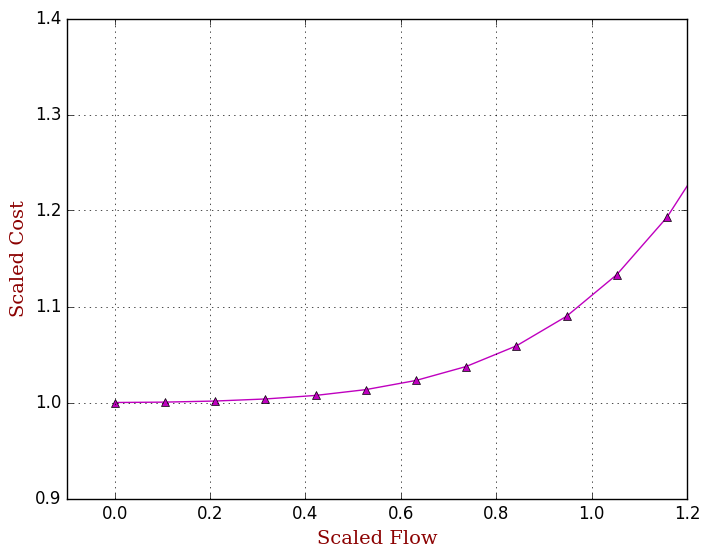

In [18]:
using PyPlot

est_coeffs = fcoeffs

xs = linspace(0, 2, 20)

zs = map(x->polyEval(est_coeffs, x), xs)

plot(xs, zs, "^-m")

grid("on")
xlim(-0.1, 1.2);
ylim(0.9, 1.4);

font1 = ["family"=>"serif","color"=>"darkred","weight"=>"normal","size"=>14]
xlabel("Scaled Flow", fontdict=font1)
ylabel("Scaled Cost", fontdict=font1)

savefig("./results/fitting_MA.pdf")

In [19]:
demandsVecDict[1] = demandsDicToVec(demandsDict[1]);
objFunDict[1] = objF(demandsVecDict[1], fcoeffs);

In [20]:
# get initial flow vector (corresponding to initial demands)
tapFlowDicDict[1], tapFlowVecDict[1] = tapMSA(demandsDict[1], fcoeffs);

demandsVecDict[0] = demandsDicToVec(demandsDict[0]);

In [21]:
# get arcs data corresponding to initial demands and flows
arcsDict[1] = observFlow("./benchmark_data/MA_net.txt", tapFlowDicDict[1]);

In [22]:
linkCostDicDict[1] = tapFlowVecToLinkCostDict(tapFlowVecDict[1], fcoeffs);

In [23]:
linkCostDicDict[1]["0"], link_length_list[1]

(0.163850651900163,0.0)

In [24]:
jacobiSpiessDict[1] = Compute_Jacobian_MA.jacobianSpiess(numNodes, numLinks, numODpairs, od_pairs, 
                                              link_list_js, [linkCostDicDict[1]["$(i)"] for i=0:numLinks-1]);

In [25]:
# maximum number of iterations
N = 100;  

# Armijo rule parameters
rho = 2;
M = 10;

# search direction parameter
epsilon_1 = 0;

# stop criterion parameter
epsilon_2 = 1e-20;

In [26]:
for l = 1:N
    
    jacobDict[l] = jacobiSpiessDict[l]

    descDirecDict[l] = descDirec(tapFlowVecDict[l], tapFlowVecDict[0], jacobDict[l], numODpairs, numLinks);

    demandsVecDict[l] = demandsDicToVec(demandsDict[l]);

    searchDirecDict[l] = searchDirec(demandsVecDict[l], descDirecDict[l], epsilon_1);

    thetaMaxDict[l] = thetaMax(demandsVecDict[l], searchDirecDict[l]);

    demandsVecDict[l+1] = similar(demandsVecDict[0]);
    
    demandsVecDict[l+1], objFunDict[l+1] = armijo(objFunDict[l], demandsVecDict[l], fcoeffs, searchDirecDict[l], 
    thetaMaxDict[l], rho, M);
            
    demandsDict[l+1] = demandsVecToDic(demandsVecDict[l+1]);
    
    tapFlowDicDict[l+1], tapFlowVecDict[l+1] = tapMSA(demandsDict[l+1], fcoeffs);
        
    arcsDict[l+1] = observFlow("./benchmark_data/MA_net.txt", tapFlowDicDict[l+1]);
        
    linkCostDicDict[l+1] = tapFlowVecToLinkCostDict(tapFlowVecDict[l+1], fcoeffs);
    
    jacobiSpiessDict[l+1] = Compute_Jacobian_MA.jacobianSpiess(numNodes, numLinks, numODpairs, od_pairs, 
                                              link_list_js, [linkCostDicDict[l+1]["$(i)"] for i=0:numLinks-1]);
        
    demandsDiffDict[l+1] = norm(demandsVecDict[l+1] - demandsVecDict[0]) / norm(demandsVecDict[0]);
    
    # stopping criterion
    if (objFunDict[l] - objFunDict[l+1]) / objFunDict[1] < epsilon_2
        break
    end
  
end

# normalize objective function value
for l = 1:(length(objFunDict))
    norObjFunDict[l] = objFunDict[l] / objFunDict[1];
end

In [27]:
demandsVecDict

Dict{Any,Any} with 25 entries:
  18 => [0.0,23.26572921868391,330.70579361709565,3.283013238242977,36.12585985…
  2  => [0.0,13.78844300803873,340.45468170558695,6.535259779828803,24.78109286…
  16 => [0.0,21.58908488120082,332.2287699121984,3.7079449411366325,34.25755105…
  11 => [0.0,18.43579906203437,335.3162602629394,4.664043236828911,30.585474582…
  21 => [0.0,25.920291122439476,328.42554074012077,2.6954725838156985,38.987432…
  0  => [0.0,0.0,364.030563,0.0,0.0,325.36421,0.0,0.0,0.0,0.0,387.087581,543.74…
  7  => [0.0,15.459127761986792,338.5228708668434,5.7929866456580585,26.9219031…
  9  => [0.0,16.656775064832956,337.1968741266899,5.30974988726973,28.419315635…
  10 => [0.0,17.639136516188064,336.1440583393644,4.94169158665065,29.624962167…
  19 => [0.0,23.621097222463455,330.3957801264812,3.201403044462903,36.51249181…
  17 => [0.0,22.703038910846928,331.2052205920532,3.4175530993911694,35.5073402…
  8  => [0.0,15.662506684388992,338.296506701669,5.709956232009555,27.17695566

In [28]:
norObjFunDict

Dict{Any,Any} with 24 entries:
  18 => 0.3877849201694104
  2  => 0.4836707260598188
  16 => 0.4012044236678823
  11 => 0.42959228367531915
  21 => 0.3685082000118461
  7  => 0.4619921699724773
  9  => 0.44832042917865395
  10 => 0.43781867955025977
  19 => 0.38511837791368636
  17 => 0.3922031461475791
  8  => 0.4596368262119619
  22 => 0.36143814093922433
  6  => 0.4630732584381321
  24 => 0.3605275110156054
  4  => 0.4794162829120321
  3  => 0.48176374360365254
  5  => 0.46581082064282553
  20 => 0.37029084708454757
  23 => 0.3605275110156054
  13 => 0.4173068857408535
  14 => 0.4104458318254982
  15 => 0.40358420257181493
  12 => 0.42908560199329254
  1  => 1.0

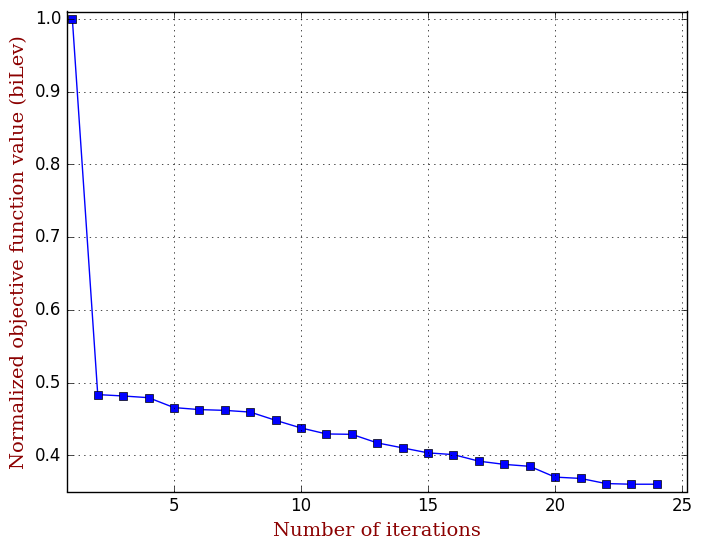

In [29]:
using PyPlot

iterNum = 1:(length(norObjFunDict))

objFun = map(iterNum->norObjFunDict[iterNum], iterNum)

# plot(iterNum, objFun, "s-g", label="True")

plot(iterNum, objFun, "s-b")

# legend(loc="upper right",fancybox="true") 

grid("on")

xlim(.8, length(norObjFunDict) + 1 + .2)
ylim(minimum(objFun)-.01, maximum(objFun)+.01)

font1 = ["family"=>"serif", "color"=>"darkred", "weight"=>"normal", "size"=>14]

xlabel("Number of iterations", fontdict=font1)
ylabel("Normalized objective function value (biLev)", fontdict=font1)

savefig("./results/objFun_biLev_MA.pdf")

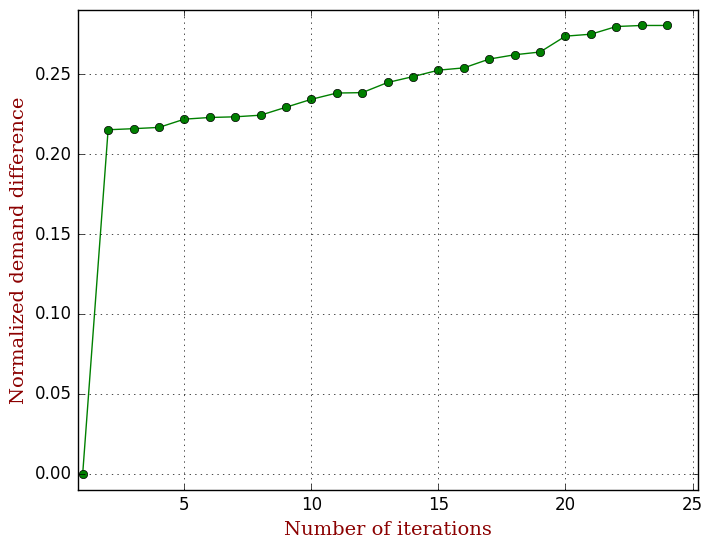

In [30]:
using PyPlot

iterNum = 1:(length(demandsDiffDict))

demandsDiff = map(iterNum->demandsDiffDict[iterNum], iterNum)

# plot(iterNum, objFun, "s-g", label="True")

plot(iterNum, demandsDiff, "o-g")

# legend(loc="upper right",fancybox="true") 

grid("on")

xlim(.8, length(demandsDiffDict) + 1 + .2)
ylim(minimum(demandsDiff)-.01, maximum(demandsDiff)+.01)

font1 = ["family"=>"serif", "color"=>"darkred", "weight"=>"normal", "size"=>14]

xlabel("Number of iterations", fontdict=font1)
ylabel("Normalized demand difference", fontdict=font1)

savefig("./results/demandsDiff_biLev_MA.pdf")

In [31]:
outfile = open("./results/norObjFunDict.json", "w")

JSON.print(outfile, norObjFunDict)

close(outfile)

In [32]:
outfile = open("./results/demandsDiffDict.json", "w")

JSON.print(outfile, demandsDiffDict)

close(outfile)

In [33]:
outfile = open("./results/demandsVecDict.json", "w")

JSON.print(outfile, demandsVecDict)

close(outfile)

In [34]:
outfile = open("./results/demandsDict$(day).json", "w")

JSON.print(outfile, demandsDict)

close(outfile)

In [35]:
outfile = open("./results/tapFlowDicDict.json", "w")

JSON.print(outfile, tapFlowDicDict)

close(outfile)

In [36]:
outfile = open("./results/tapFlowVecDict.json", "w")

JSON.print(outfile, tapFlowVecDict)

close(outfile)

In [37]:
demandsDict[length(demandsDict)-1]

Dict{(Int64,Int64),Float64} with 484 entries:
  (6,9)   => 5.507132520116008
  (18,3)  => 0.0
  (21,13) => 43.86687962867125
  (22,16) => 55.884457178746416
  (15,17) => 0.0
  (22,14) => 0.0
  (13,9)  => 0.0018335009082821412
  (8,9)   => 28.50237610334109
  (9,1)   => 0.0
  (17,14) => 494.2855452997817
  (16,6)  => 0.0
  (16,12) => 417.2527600690739
  (16,13) => 817.0808937478366
  (22,2)  => 22.110013570470805
  (7,16)  => 698.7228920797013
  (1,12)  => 426.6083145535308
  (4,5)   => 39.03065683260137
  (11,8)  => 59.34222981263705
  (18,21) => 0.0
  (19,4)  => 57.86564403711494
  (20,13) => 36.74120954532595
  (15,4)  => 106.80427332559725
  (6,18)  => 41.046401860276774
  (5,16)  => 0.0
  (4,9)   => 0.0
  ⋮       => ⋮

In [38]:
demandsDict_ = Dict{}()

for key in keys(demandsDict[length(demandsDict)-1])
    demandsDict_[key] = demandsDict[length(demandsDict)-1][key] 
end

In [39]:
outfile = open("./results/demandsDictFixed$(day).json", "w")

JSON.print(outfile, demandsDict_)

close(outfile)